I explored the relationship between academic factors and mental health among university students using Python and statistical tests.

<!--IMPORTING THE DATASET  -->
PREDICTING AND IMPROVING STUDENTS MENTAL HEALTH ANALYSIS

In [1]:
import pandas as pd

In [2]:
mental_stud=pd.read_csv('Student Mental health.csv') 
mental_stud.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


This code imports the dataset into a pandas DataFrame named mental_stud and displays the first five records to understand its structure.

<!-- CHECKING AND FILLING MISSING VALUES  -->
Before performing any analysis, it’s important to check if the dataset contains missing or null values.  
Missing data can affect the accuracy of results, so identifying and handling them early is essential.

In [3]:
mental_stud.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [4]:
mental_stud.dropna(inplace=True)

In [5]:
mental_stud.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

<!-- GENDER DISTRIBUTION IN THE DATASET -->
This analysis aims to understand how academic performance, gender, and study level influence students’ mental health — helping universities develop better support programs

In [6]:
# Gender distribution in the dataset
gender_count= mental_stud['Choose your gender'].value_counts()
gender_count


Choose your gender
Female    75
Male      25
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

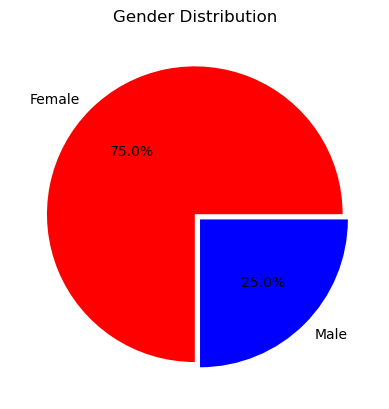

In [8]:
plt.pie(
    gender_count, 
    labels=gender_count.index, 
    colors=['red', 'blue'], 
    autopct='%1.1f%%', 
    explode=(0, 0.05)
)
plt.title('Gender Distribution')
plt.show()

<!-- AVERAGE CGPA OF ALL STUDENTS  -->
The CGPA column in the dataset contains ranges such as `"3.00 - 3.49"`, which makes it difficult to compute numerical statistics directly.  
To solve this, we clean the column by:
1. Removing extra spaces.  
2. Converting CGPA ranges into their **midpoint values** (e.g., `3.00 - 3.49 → 3.25`).  
3. Creating a new column called `CGPA_numeric` that holds these numeric values.  

After cleaning, we compute the **average CGPA** of all students.

In [9]:
import numpy as np

# Clean the CGPA column
def convert_cgpa(value):
    # remove spaces
    value = str(value).strip()
    # if it's a range (e.g. '3.00 - 3.49')
    if '-' in value:
        parts = value.split('-')
        try:
            low = float(parts[0])
            high = float(parts[1])
            return (low + high) / 2   # midpoint of the range
        except:
            return np.nan
    else:
        try:
            return float(value)
        except:
            return np.nan

mental_stud['CGPA_numeric'] = mental_stud['What is your CGPA?'].apply(convert_cgpa)

# Now compute mean
average_cgpa = mental_stud['CGPA_numeric'].mean()
print("Average CGPA:", round(average_cgpa, 2))


Average CGPA: 3.38


<!--HOW MANY STUDENTS REPORTED HAVING DEPRESSION, ANXIETY OR PANIC ATTACKS  -->
In this step, we analyze how many students reported experiencing depression, anxiety, or panic attacks.  
We count the number of "Yes" responses in each category and then visualize the results with a pie chart 
to show their distribution clearly.


Depression: 35
Anxiety: 34
Panic attacks: 33


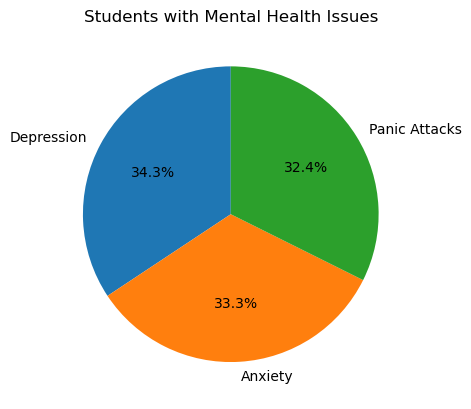

In [10]:
import matplotlib.pyplot as plt

# Count 'Yes' responses
depression_count = mental_stud['Do you have Depression?'].value_counts().get('Yes', 0)
anxiety_count = mental_stud['Do you have Anxiety?'].value_counts().get('Yes', 0)
panic_count = mental_stud['Do you have Panic attack?'].value_counts().get('Yes', 0)

print('Depression:', depression_count)
print('Anxiety:', anxiety_count)
print('Panic attacks:', panic_count)

# Values and labels
values = [depression_count, anxiety_count, panic_count]
labels = ['Depression', 'Anxiety', 'Panic Attacks']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Students with Mental Health Issues')
plt.show()

<!-- WHAT PERCENTAGE OF STUDENTS SOUGHT PROFESSIONAL HELP FOR MENTAL HEALTH ISSUES  -->
In this analysis, we examine how many students sought specialist treatment for their mental health concerns. This helps us understand students’ willingness to reach out for professional support when facing challenges such as depression, anxiety, or panic attacks.

The pie chart below visually represents the proportion of students who sought help versus those who did not.

Did you seek any specialist for a treatment?
No     94
Yes     6
Name: count, dtype: int64


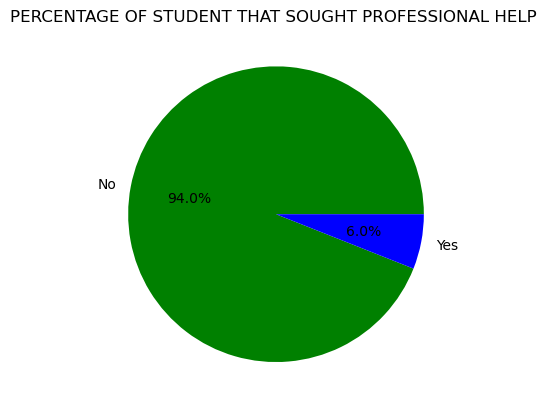

In [11]:
student_professional_help = mental_stud['Did you seek any specialist for a treatment?'].value_counts()
print(student_professional_help)

import matplotlib.pyplot as plt 
plt.pie(student_professional_help,
       labels=student_professional_help.index,
       colors=['green','blue'],
       autopct='%1.1f%%',
       )
plt.title('PERCENTAGE OF STUDENT THAT SOUGHT PROFESSIONAL HELP ')
plt.show()

<!--CONVERTING AND MERGING YEARS ON THE DATASET  -->
Before performing analysis on the Year of Study, it’s important to ensure consistency in the data.
Here, we convert all entries in the Your current year of Study column to lowercase. This helps prevent issues caused by inconsistent capitalization (e.g., Year 1 vs year 1) when grouping or counting data.

In [12]:
mental_stud['Your current year of Study']= mental_stud['Your current year of Study'].str.lower()

<!-- THE YEAR REPORTED THE ISSUE TO A THERAPIST  -->
In this step, we analyze which year of study has the highest number of students reporting mental health issues (depression, anxiety, or panic attacks).
We filter the dataset to include only students who reported at least one of these conditions, then count the number of affected students in each academic year.

The bar chart below visualizes the distribution of reported mental health issues across years of study.

Your current year of Study
year 1    25
year 2    19
year 3    18
year 4     2
Name: count, dtype: int64


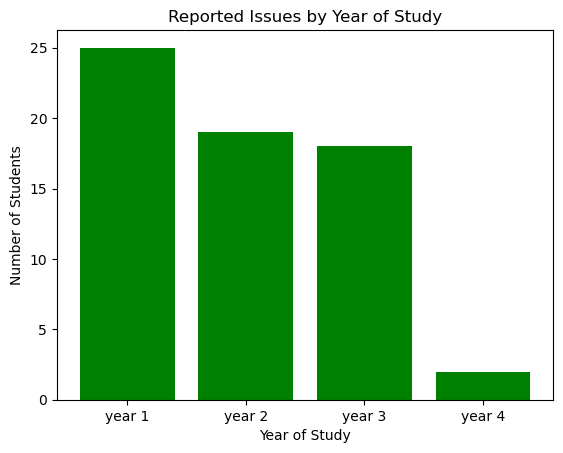

In [13]:
reported_issues = mental_stud[
    (mental_stud['Do you have Depression?']=='Yes') |
    (mental_stud['Do you have Anxiety?']=='Yes') |
    (mental_stud['Do you have Panic attack?']=='Yes')
]

# Count how many in each year reported issues
yearly_reported_counts = reported_issues['Your current year of Study'].value_counts()

print(yearly_reported_counts)


import matplotlib.pyplot as plt

# Plot the bar chart
plt.bar(yearly_reported_counts.index, yearly_reported_counts.values, color='green')
plt.title('Reported Issues by Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Number of Students')
plt.show()


Most students reporting mental health issues are in Year 1, followed by Year 2 and Year 3.

Year 4 has the fewest reported cases, which could indicate either lower stress levels, underreporting, or a smaller population in the dataset.

<!--  HOW DOES DEPRESSION,ANXIETY OR PANIC ATTACKS AFFECT STUDENT'S CGPA -->
To investigate whether a student’s CGPA is associated with reporting depression, anxiety, or panic attacks, we first convert the categorical responses (Yes/No) into numeric values (1/0).

We then perform a Chi-square test of independence for each mental health condition. This statistical test helps determine whether there is a significant relationship between CGPA ranges and the occurrence of mental health issues.

In [14]:
mental_stud['Do you have Depression?']= mental_stud['Do you have Depression?'].map({'Yes':1,'No':0})
mental_stud['Do you have Anxiety?']=mental_stud['Do you have Anxiety?'].map({'Yes':1,'No':0})
mental_stud['Do you have Panic attack?']=mental_stud['Do you have Panic attack?'].map({'Yes':1,'No':0})

import pandas as pd
from scipy.stats import chi2_contingency

# Create an empty list to store results
results = []

# Depression
table = pd.crosstab(mental_stud['What is your CGPA?'], mental_stud['Do you have Depression?'])
chi2, p, dof, expected = chi2_contingency(table)
results.append(['Depression', chi2, p])

# Anxiety
table = pd.crosstab(mental_stud['What is your CGPA?'], mental_stud['Do you have Anxiety?'])
chi2, p, dof, expected = chi2_contingency(table)
results.append(['Anxiety', chi2, p])

# Panic attack
table = pd.crosstab(mental_stud['What is your CGPA?'], mental_stud['Do you have Panic attack?'])
chi2, p, dof, expected = chi2_contingency(table)
results.append(['Panic attack', chi2, p])

# Convert results into a DataFrame for table display
result_df = pd.DataFrame(results, columns=['Mental Health Condition', 'Chi-square Value', 'p-value'])
print(result_df)


  Mental Health Condition  Chi-square Value   p-value
0              Depression         10.809576  0.055289
1                 Anxiety          3.637144  0.602745
2            Panic attack          8.913032  0.112584


Analysis of Chi-Square Test Results
Mental Health Condition	Chi-square Value	p-value
Depression	10.81	0.0553
Anxiety	3.64	0.6027
Panic attack	8.91	0.1126

Interpretation:

Depression

The p-value is 0.0553, slightly above the standard significance level of 0.05.

This suggests there is no statistically significant association between CGPA and depression, although it’s close — there might be a weak relationship worth exploring further.

Anxiety

The p-value is 0.6027, much higher than 0.05.

This indicates no significant relationship between CGPA and anxiety.

Panic attack

The p-value is 0.1126, higher than 0.05.

Again, there is no statistically significant association between CGPA and panic attacks.

Conclusion:
Based on this dataset, students’ CGPA does not appear to be significantly associated with whether they experience depression, anxiety, or panic attacks.

Which departemnt has the highest cases of depression, anxiety and panic attacks 
This gives you a table showing how many students in each course said “Yes” to depression, anxiety, and panic attack.

In [16]:
# Count number of "Yes" responses for each course
course_summary = mental_stud.groupby("What is your course?")[["Do you have Depression?", 
                                                         "Do you have Anxiety?", 
                                                         "Do you have Panic attack?"]].apply(lambda x: (x == "Yes").sum())


Find which department has the highest “Yes” for each condition

In [17]:
most_depressed = course_summary["Do you have Depression?"].idxmax()
most_anxious = course_summary["Do you have Anxiety?"].idxmax()
most_panic = course_summary["Do you have Panic attack?"].idxmax()

print("Department with most depression cases:", most_depressed)
print("Department with most anxiety cases:", most_anxious)
print("Department with most panic attack cases:", most_panic)


Department with most depression cases: ALA
Department with most anxiety cases: ALA
Department with most panic attack cases: ALA


The department with the most depression cases, anxiety cases and panic attacks is "Applied Linguistics and Arts(ALA)"